<a href="https://colab.research.google.com/github/zhuchangyan/Multimode-fiber-Image-reconstruction/blob/master/Phase_retrieval_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2019/12/11  修改噪声模式为转移矩阵模式

测试一下fourier transform的效果。

In [0]:
from PIL import Image 
import numpy as np
img = Image.open("/gdrive/My Drive/Colab Notebooks/image processing/IMG_20190205_175448.jpg")
img = img.resize((28,28),Image.ANTIALIAS)
img=np.array(img,complex)
img = img[:,:,0]/256.0


Here I intend to add fourier transform with no initial phase.

In [0]:
get_shape= np.shape(img)
thelta = np.random.random(get_shape)
phase = np.exp(2j*np.pi* thelta)
Phase_img = img * phase


Define transmission matrix

In [0]:
from numpy.fft import fft2, ifft2, fftshift
from sklearn.preprocessing import normalize

input_modes = fft2(img)

# Define output modes
M = 20 
N = 10

input = input_modes.flatten()
TM_shape = (M*N, len(input))
TM = np.random.random(TM_shape) + np.random.random(TM_shape)* complex(0,1)  #define the transmission matrix
norm = normalize(np.abs(TM), axis = 0 , norm='l2')  # normalize the transmission matrix 
TM = norm * TM / np.abs(TM)

output = TM @ input
output_modes = output.reshape((M,N))
output_img = ifft2(output_modes)


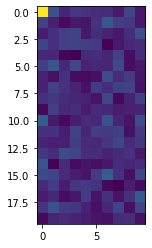

In [154]:
#plot output image

import matplotlib.pyplot as plt

plt.imshow(np.abs(output_img))

phase_img **Vs** img

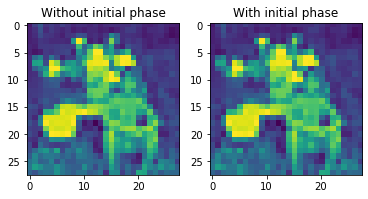

In [0]:
plt.subplot(1,2,1)
plt.imshow(np.abs(img))
plt.title("Without initial phase")

plt.subplot(1,2,2)
plt.imshow(np.abs(Phase_img))
plt.title("With initial phase")

plt.show()

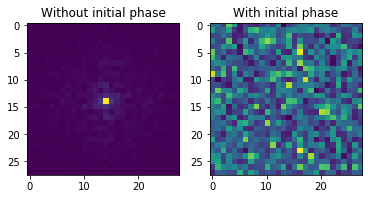

In [0]:
from numpy.fft import fft2, ifft2 ,fftshift

B1 = fftshift(fft2(img))
B2 = fftshift(fft2(Phase_img))

# plot fourier image

import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.imshow(np.abs(B1))
plt.title("Without initial phase")

plt.subplot(1,2,2)
plt.imshow(np.abs(B2))
plt.title("With initial phase")

plt.show()


From the above we can see that: Without the initial phase,
the amplitude of the fourier remian in low frequency area, while with 
the random phase, the frequency become much more diverse.

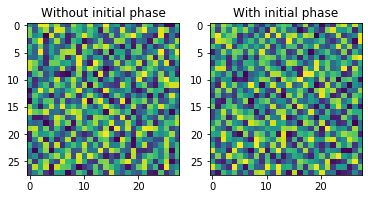

In [0]:
plt.subplot(1,2,1)
plt.imshow(np.angle(B1))
plt.title("Without initial phase")

plt.subplot(1,2,2)
plt.imshow(np.angle(B2))
plt.title("With initial phase")

plt.show()

Deal with transmission matrix

In [0]:
A1 = A1.reshape((M,N))
A2 = A2.reshape((M,N))



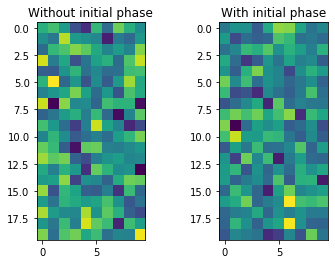

In [0]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.imshow(np.abs(A1))
plt.title("Without initial phase")

plt.subplot(1,2,2)
plt.imshow(np.abs(A2))
plt.title("With initial phase")

plt.show()


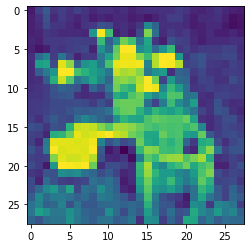

In [0]:
import matplotlib.pyplot as plt
plt.imshow(np.abs(Phase_img))

In [0]:
from numpy.fft import fft2,ifft2,fftshift

trans = fft2(img[:,:,1])
trans= fftshift(trans)
np.shape(trans)


(3024, 4032)

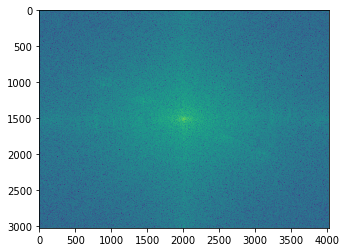

In [0]:
import matplotlib.pyplot as plt
plt.imshow(np.log10(np.abs(trans)))

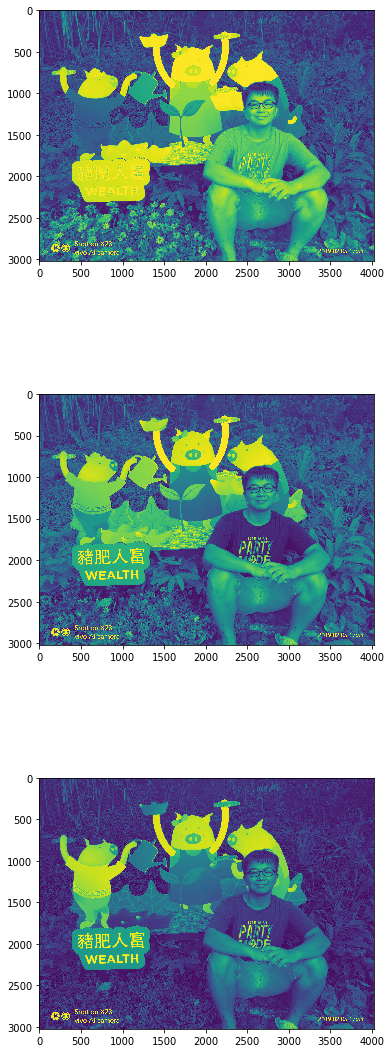

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,20))
plt.subplot(3,1,1)
plt.imshow(k[:,:,0])
plt.subplot(3,1,2)
plt.imshow(k[:,:,1])
plt.subplot(3,1,3)
plt.imshow(k[:,:,2])

In [0]:
from cvxpy import *
import numpy as np
import matplotlib.pyplot as plt

# Number of input elements (SLM/DMD pixels)
m = 40
# Number of random input masks
p = 200

# Number of output elements
mn=1


In [0]:
TM = np.random.randn(m) + np.random.randn(m)*complex(0,1)  # transmission matrix --- a row

In [0]:
# input binary patterns
#X = np.random.rand(m,p)>0.5 +0j
#X = np.random.rand(m,p)+np.random.rand(m,p)*complex(0,1)
X = np.exp(complex(0,1)*np.random.rand(m,p)*2*np.pi)
Y = np.abs(TM@X)

In [0]:
import numpy as np
np.random.randn(3)

array([-0.11691268, -0.20446262,  0.38988302])

In [0]:
Q = np.diag(np.abs(Y))@(np.eye(p)-np.linalg.pinv(X)@X)@np.diag(np.abs(Y))
# Variable (unkown) of the problem
U = Variable((p,p), hermitian=True)
# Objective to minimize
objective = Minimize(abs(trace(Q@U)))
# Constraints
# 1. U is positive semidefinite
constraints = [U>>0]
# 2. Elements of the diagonal are 1.
for k in range(p):
    constraints+= [U[k,k] == 1]
prob = Problem(objective,constraints)
# 3. U is Hermitian (alread set at the initialization of U)

# Run the solver
prob.solve(solver=SCS,verbose=True,eps=1e-5,max_iters = 100000)

----------------------------------------------------------------------------
	SCS v2.1.1 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 240589
eps = 1.00e-05, alpha = 1.50, max_iters = 100000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 60101, constraints m = 80603
Cones:	primal zero / dual free vars: 400
	soc vars: 3, soc blks: 1
	sd vars: 80200, sd blks: 1
Setup time: 1.69e-01s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.97e+23  5.92e+21  1.00e+00 -2.98e+24  3.11e+23  8.40e+23  7.83e-02 
   100| 3.64e-02  1.86e-02  3.60e-02  2.29e-01  2.83e-01  1.11e-14  1.20e+01 
   200| 8.78e-03  3.24e-03  3.63e-03  9.51e-02

-7.424408670245477e-06

In [0]:
np.shape(X)

(40, 200)

Text(0.5, 1.0, 'Difference between real output phase and prediction')

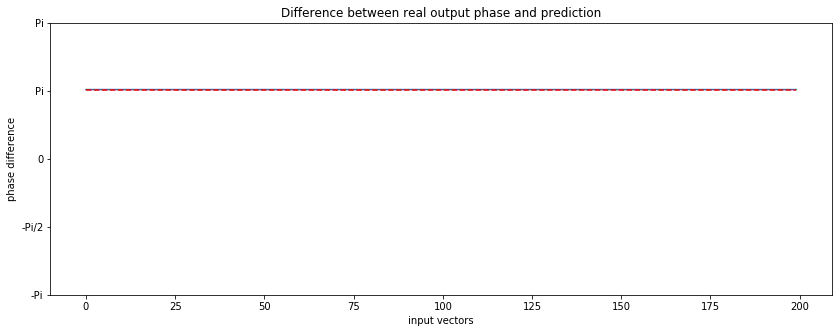

In [0]:
# Take the first eigenvector of U as the estimation of the output phase matrix
S,V = np.linalg.eig(U.value)

phase_est = -np.angle(V[:,0])
phase_real = np.angle(np.dot(TM,X))
phase_difference = np.angle(np.exp(complex(0,1)*(phase_est-phase_real)))

phi0 = np.mean(phase_difference)
plt.figure(figsize=(14,5))
plt.plot(phase_difference)
plt.plot([phi0]*len(phase_difference),'r--')
plt.ylim([-np.pi,np.pi])
plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],['-Pi','-Pi/2','0','Pi','Pi'])
plt.xlabel('input vectors')
plt.ylabel('phase difference')
plt.title('Difference between real output phase and prediction')

In [0]:
np.shape(V[:,0])

(200,)

Text(0.5, 1.0, 'Imaginary part')

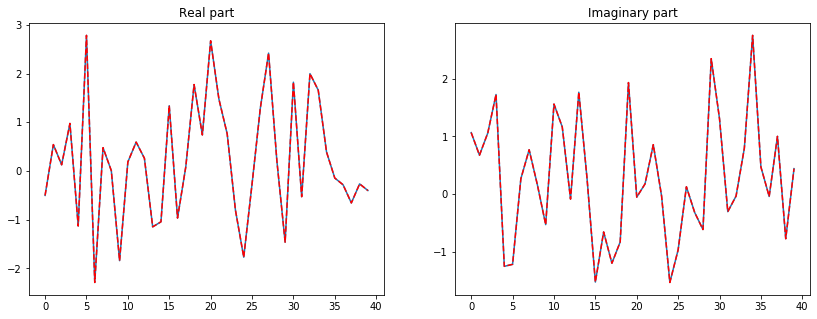

In [0]:
Y2 = Y*np.exp(complex(0,1)*(-phi0-np.angle(V[:,0])))
H_hat = Y2@np.linalg.pinv(X)
plt.figure(figsize=(14,5))
plt.title('Transmission matrix')
plt.subplot(121)
plt.plot(np.real(H_hat))
plt.plot(np.real(TM),'r--')
plt.title('Real part')
plt.subplot(122)
plt.plot(np.imag(H_hat))
plt.plot(np.imag(TM),'r--')
plt.title('Imaginary part')